In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pd.set_option('display.max_columns', 20)

In [3]:
#pip install mlxtend

In [4]:
#importing requied libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori #, association_rule

C:\Users\Skynet\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
#Loading the data
#may be there is non standerd null values, replace all as NaN
df=pd.read_csv("data1.csv",na_values=(" ","?","_","-1"))
df.head()

,ID,Transaction,Time,Item -code,NumberOfItemsPurchased,CostPerItem,CITY
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah


In [11]:
#disply the bottom 5 rows
df.tail()

,ID,Transaction,Time,Item -code,NumberOfItemsPurchased,CostPerItem,CITY
1763,1667,1965,Mon Jul 23 08:58:00 IST 2018,261,3,2.01,Ras Al Khaimah
1764,1869,1785,Sun Aug 19 07:39:00 IST 2018,548,36,1.73,Ras Al Khaimah
1765,1675,1928,Wed Apr 04 07:17:00 IST 2018,237,-36,2.01,Ras Al Khaimah
1766,390,2025,Mon Feb 04 07:30:00 IST 2019,278,3,2.28,Ras Al Khaimah
1767,687,1001,Mon Dec 10 12:24:00 IST 2018,211,3,3.40,Ras Al Khaimah


In [12]:
#explore total number of rows and columns
df.shape

(1768, 7)

**Data Preprocessing**

In [13]:

df=df[pd.notnull(df["ID"])]

In [14]:
#dropingduplicates record because a huge data set as in thes case contains 1083818 recodes
#often have some duplicate data which might be disturbing.
df=df.drop_duplicates()
df.head()

,ID,Transaction,Time,Item -code,NumberOfItemsPurchased,CostPerItem,CITY
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah


In [15]:
#checking the shape after removing duplicate values
df.shape

(1768, 7)

In [16]:
#explore columns of the data for forther use
df.columns

Index(['ID', 'Transaction', 'Time', 'Item -code ', 'NumberOfItemsPurchased',
       'CostPerItem', 'CITY'],
      dtype='object')

In [17]:
#renaming the columns
df=df.rename(columns={"NumberOfItemsPurchased":"Quantity"})

In [18]:
#customers ordered negative quantity,which is not possible.so we filter quantity grater then zero
df=df[(df["Quantity"]>0)]

In [19]:
#finding the null values
df.isnull().sum()

ID             0
Transaction    0
Time           0
Item -code     0
Quantity       0
CostPerItem    0
CITY           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1738 non-null   int64  
 1   Transaction  1738 non-null   int64  
 2   Time         1738 non-null   object 
 3   Item -code   1738 non-null   int64  
 4   Quantity     1738 non-null   int64  
 5   CostPerItem  1738 non-null   float64
 6   CITY         1738 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 108.6+ KB


In [21]:
#droping the missing values
df=df.dropna()
df.count()

ID             1738
Transaction    1738
Time           1738
Item -code     1738
Quantity       1738
CostPerItem    1738
CITY           1738
dtype: int64

Feature engineering

In [22]:
#adding a new column total Cost
df['Total_Cost']=df['Quantity']*df['CostPerItem']
df.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20


In [23]:
#finding those coustomers who done max shoping.
s_data=df.query('CITY=="Ras Al Khaimah"').sort_values("Total_Cost",ascending=False)
s_data.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
390,829,1987,Sun Dec 02 06:12:00 IST 2018,248,2232,2.05,Ras Al Khaimah,4575.60
412,1430,1907,Tue Oct 16 14:06:00 IST 2018,494,1080,2.01,Ras Al Khaimah,2170.80
986,1320,2020,Sun Sep 02 06:53:00 IST 2018,373,1728,1.19,Ras Al Khaimah,2056.32
1088,630,2046,Sat Jul 28 10:24:00 IST 2018,410,300,6.33,Ras Al Khaimah,1899.00
883,1213,1998,Sun Jun 10 12:41:00 IST 2018,576,474,2.70,Ras Al Khaimah,1279.80


In [24]:
#finding most expensive items
most_exp_items=df.sort_values("CostPerItem",ascending=False)
most_exp_items.head()


,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
1292,1646,2073,Wed Jun 06 11:50:00 IST 2018,349,3,304.58,Ras Al Khaimah,913.74
1625,773,2096,Sun Apr 22 09:35:00 IST 2018,623,3,212.12,Ras Al Khaimah,636.36
72,1789,1814,Mon Jan 14 11:33:00 IST 2019,617,3,80.45,Ras Al Khaimah,241.35
798,1784,1930,Tue Oct 16 15:22:00 IST 2018,671,3,68.94,Ras Al Khaimah,206.82
1104,466,2012,Mon Dec 24 08:42:00 IST 2018,653,3,55.14,Ras Al Khaimah,165.42


In [25]:
#finding max and min for each column
df.agg(["max","min"])


,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
max,2000,2100,Wed Sep 26 13:29:00 IST 2018,700,2232,304.58,Umm Al Quwain,4575.6
min,200,1001,Fri Apr 06 07:15:00 IST 2018,200,3,0.00,Ajman,0.0


In [26]:
df['CITY'].value_counts()

CITY
Ras Al Khaimah    1607
Umm Al Quwain       63
Dubai               39
Ajman               29
Name: count, dtype: int64

Text(0.5, 0, 'city')

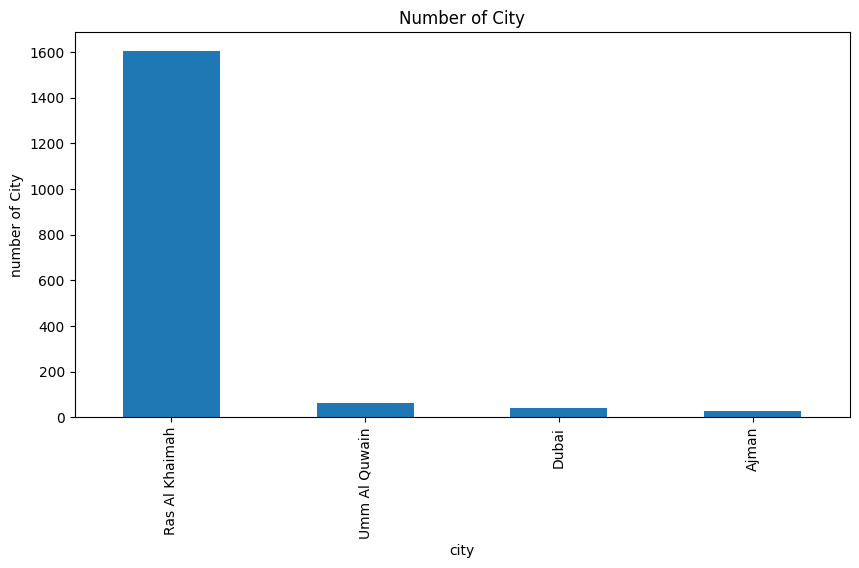

In [27]:
df.CITY.value_counts().nlargest(15).plot(kind="bar",figsize=(10,5))
plt.title("Number of City")
plt.ylabel("number of City")
plt.xlabel("city")

#In this figer we can see most of thr customers are from "United Kingdom".so we filter data for UK customer

In [28]:
Rak_data=df[df.CITY== "Ras Al Khaimah"]

In [29]:
Rak_data.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20
5,1157,2045,Fri Jan 11 09:50:00 IST 2019,568,12,3.52,Ras Al Khaimah,42.24


In [30]:
Rak_data.describe()

,ID,Transaction,Item -code,Quantity,CostPerItem,Total_Cost
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,1099.466086,1931.871189,445.606721,31.387057,4.719123,75.730006
std,525.680196,98.864211,145.778713,94.104818,10.508227,183.704658
min,200.000000,1001.000000,200.000000,3.000000,0.000000,0.000000
25%,639.500000,1849.000000,316.000000,3.000000,1.730000,13.920000
50%,1114.000000,1935.000000,442.000000,9.000000,2.880000,35.400000
75%,1557.500000,2014.000000,568.000000,36.000000,5.700000,71.820000
max,2000.000000,2100.000000,700.000000,2232.000000,304.580000,4575.600000


In [31]:
#finding time when min and max transaction done
Rak_data['Time'].max() ,Rak_data['Time'].min()

('Wed Sep 26 13:29:00 IST 2018', 'Fri Apr 06 07:15:00 IST 2018')

In [32]:
data=Rak_data[["ID","Transaction","Time","Quantity","CostPerItem","Total_Cost"]]

data.tail()

,ID,Transaction,Time,Quantity,CostPerItem,Total_Cost
1762,1920,1871,Mon Jul 23 04:34:00 IST 2018,6,10.98,65.88
1763,1667,1965,Mon Jul 23 08:58:00 IST 2018,3,2.01,6.03
1764,1869,1785,Sun Aug 19 07:39:00 IST 2018,36,1.73,62.28
1766,390,2025,Mon Feb 04 07:30:00 IST 2019,3,2.28,6.84
1767,687,1001,Mon Dec 10 12:24:00 IST 2018,3,3.40,10.20


In [33]:
PRESENT=dt.datetime(2019,1,26)
data['Time'] = pd.to_datetime(data['Time'])

C:\Users\Skynet\AppData\Local\Temp\ipykernel_8888\3037979690.py:2: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['Time'] = pd.to_datetime(data['Time'])
C:\Users\Skynet\AppData\Local\Temp\ipykernel_8888\3037979690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'])


In [34]:
rfm= data.groupby('ID').agg({'Time': lambda date: (PRESENT - date.max()).days,
                                    'Transaction': lambda num: len(num),
                                    'Total_Cost': lambda price: price.sum()})  
rfm.head()

,Time,Transaction,Total_Cost
ID,,,
200,228,1,17.10
202,199,1,288.00
203,298,1,24.48
204,54,3,178.74
205,33,1,155.70


In [35]:
rfm.columns

Index(['Time', 'Transaction', 'Total_Cost'], dtype='object')

In [36]:
# Change the name of columns 
rfm.columns=['recency','frequency','monetary']

In [37]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['recency']

ID
200     228
202     199
203     298
204      54
205      33
       ... 
1993    241
1994    311
1998    308
1999    193
2000     61
Name: recency, Length: 1064, dtype: int32

In [38]:

rfm.head(15)

,recency,frequency,monetary
ID,,,
200,228,1,17.10
202,199,1,288.00
203,298,1,24.48
204,54,3,178.74
205,33,1,155.70
207,52,1,61.92
209,298,1,3.48
210,-23,3,47.19
211,-15,1,24.66


In [39]:
#droping the missing values
rfm=rfm.dropna()
rfm.count()

recency      1064
frequency    1064
monetary     1064
dtype: int64

In [40]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm["monetary_score"]= pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
ID,,,,,,
200,228,1,17.10,1,1,1
202,199,1,288.00,2,1,5
203,298,1,24.48,1,1,2
204,54,3,178.74,3,5,5
205,33,1,155.70,4,1,5


In [41]:
#RFM - The value of 2 different variables that were formed was recorded as a RFM_SCORE
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
ID,,,,,,,
200,228,1,17.10,1,1,1,11
202,199,1,288.00,2,1,5,21
203,298,1,24.48,1,1,2,11
204,54,3,178.74,3,5,5,35
205,33,1,155.70,4,1,5,41


In [42]:
segt_map = {
    r'[1:5][1:5]': 'Risk',
    r'[1:5]2': 'Loyal customers',
    r'[11:15]': 'Potential loyalist',
  
}

rfm['Segment'] = rfm['RFM_SCORE'].replace(segt_map, regex=True)
rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
ID,,,,,,,,
200,228,1,17.10,1,1,1,11,Risk
202,199,1,288.00,2,1,5,21,2Potential loyalist
203,298,1,24.48,1,1,2,11,Risk
204,54,3,178.74,3,5,5,35,3Potential loyalist
205,33,1,155.70,4,1,5,41,4Potential loyalist
207,52,1,61.92,3,1,3,31,3Potential loyalist
209,298,1,3.48,1,1,1,11,Risk
210,-23,3,47.19,5,5,3,55,Risk
211,-15,1,24.66,5,1,2,51,Risk


In [44]:
rfm.to_csv('segment1.csv', sep=',', index=False, encoding='utf-8')


In [ ]:
final=rfm2.groupby("Clusters")["recency","frequency","monetary"].mean()
final

# using Kmeans for customer segemnt 

In [67]:
rfm2 =df
rfm2.head(3)

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost,Clusters,group
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38,4,v.good
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56,2,risk
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80,2,risk


In [68]:
print(rfm2.dtypes)

ID               int64
Transaction      int64
Time            object
Item -code       int64
Quantity         int64
CostPerItem    float64
CITY            object
Total_Cost     float64
Clusters         int32
group           object
dtype: object


In [69]:
import numpy as np

In [70]:
# Strip any extra spaces from the column names
rfm2.columns = rfm2.columns.str.strip()


In [71]:
print(rfm2.columns)


Index(['ID', 'Transaction', 'Time', 'Item -code', 'Quantity', 'CostPerItem',
       'CITY', 'Total_Cost', 'Clusters', 'group'],
      dtype='object')


In [72]:
rfm2_numeric = rfm2[['ID', 'Transaction', 'Item -code', 'Quantity', 'CostPerItem', 'Total_Cost']]


In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(rfm2_numeric)


In [74]:
from sklearn.cluster import MiniBatchKMeans


In [75]:
from sklearn.cluster import KMeans


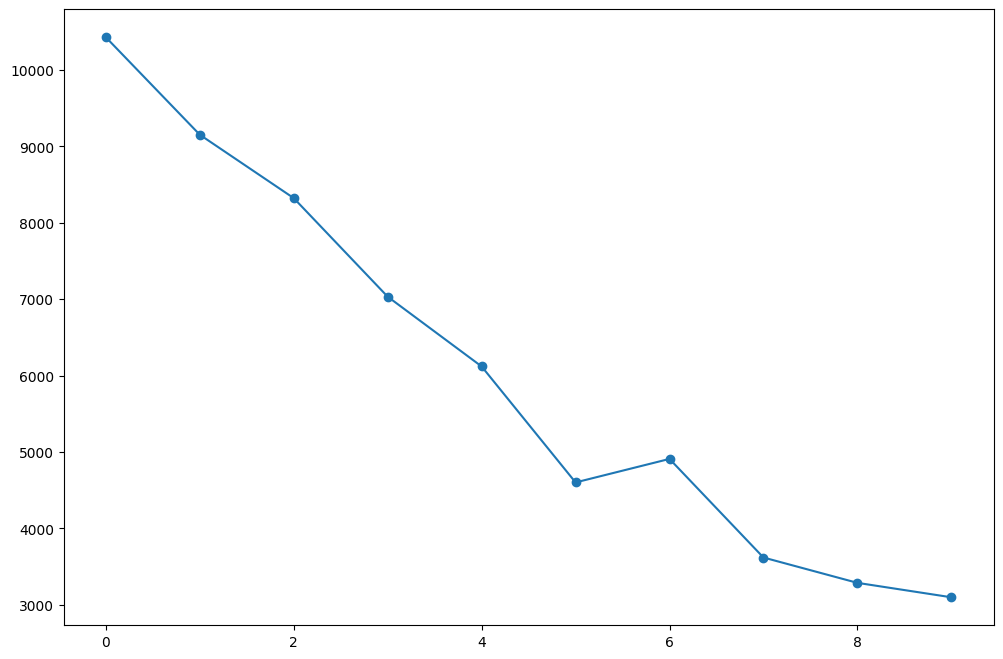

In [76]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")





In [77]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled)
rfm2["Clusters"]=(kmeans.labels_+1)

In [78]:
rfm2

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost,Clusters,group
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38,1,v.good
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56,3,risk
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80,2,risk
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19,4,risk
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20,4,risk
...,...,...,...,...,...,...,...,...,...,...
1762,1920,1871,Mon Jul 23 04:34:00 IST 2018,505,6,10.98,Ras Al Khaimah,65.88,3,risk
1763,1667,1965,Mon Jul 23 08:58:00 IST 2018,261,3,2.01,Ras Al Khaimah,6.03,2,risk
1764,1869,1785,Sun Aug 19 07:39:00 IST 2018,548,36,1.73,Ras Al Khaimah,62.28,3,risk
1766,390,2025,Mon Feb 04 07:30:00 IST 2019,278,3,2.28,Ras Al Khaimah,6.84,2,v.good


In [86]:
def func(row):
    if row["Clusters"]==1:
        return 'higth_risk'
    elif row["Clusters"]==2:
        return 'risk'
    elif row["Clusters"]==3:
          return 'good'
    else:
        return 'v.good'

In [87]:
rfm2['group']=rfm2.apply(func, axis=1)

In [88]:
rfm2

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost,Clusters,group
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38,1,higth_risk
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56,3,good
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80,2,risk
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19,4,v.good
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20,4,v.good
...,...,...,...,...,...,...,...,...,...,...
1762,1920,1871,Mon Jul 23 04:34:00 IST 2018,505,6,10.98,Ras Al Khaimah,65.88,3,good
1763,1667,1965,Mon Jul 23 08:58:00 IST 2018,261,3,2.01,Ras Al Khaimah,6.03,2,risk
1764,1869,1785,Sun Aug 19 07:39:00 IST 2018,548,36,1.73,Ras Al Khaimah,62.28,3,good
1766,390,2025,Mon Feb 04 07:30:00 IST 2019,278,3,2.28,Ras Al Khaimah,6.84,2,risk


In [89]:
result=rfm2.group.value_counts()

In [90]:
result

group
good          462
higth_risk    432
v.good        428
risk          416
Name: count, dtype: int64

<Axes: ylabel='group'>

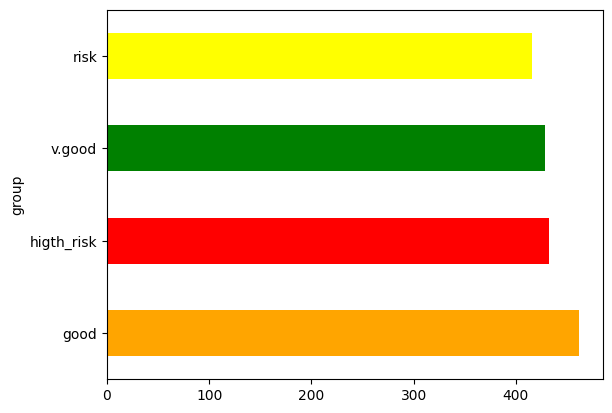

In [91]:
result.plot(kind="barh", color=["Orange","Red","Green","Yellow"])

In [113]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

In [114]:
# افترض أن لديك البيانات التي تم تجميعها في متغير "scaled" وعلامات التجميع في "rfm2['Clusters']"
labels = rfm2['Clusters']

In [115]:
# حساب تقييم السيليويت
silhouette_avg = silhouette_score(scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.192


In [116]:
# حساب مقياس Davies-Bouldin
db_index = davies_bouldin_score(scaled, labels)
print(f'Davies-Bouldin Index: {db_index:.3f}')


Davies-Bouldin Index: 1.599


In [117]:
# حساب التباين داخل المجموعات (Inertia)
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled)
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.3f}')

Inertia: 7662.944


In [123]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# افترض أن لديك مصفوفة بيانات تسمى `scaled` تم تحجيمها مسبقًا

# إعداد DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

# تنفيذ التجميع
clusters = dbscan.fit_predict(scaled)

# إضافة النتائج إلى DataFrame
rfm2["Clusters"] = clusters

# حساب عدد المجموعات (باستثناء الضوضاء)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"عدد المجموعات: {num_clusters}")

# طباعة عدد النقاط في كل مجموعة
print(rfm2['Clusters'].value_counts())


عدد المجموعات: 2
Clusters
 0    1226
-1     508
 1       4
Name: count, dtype: int64


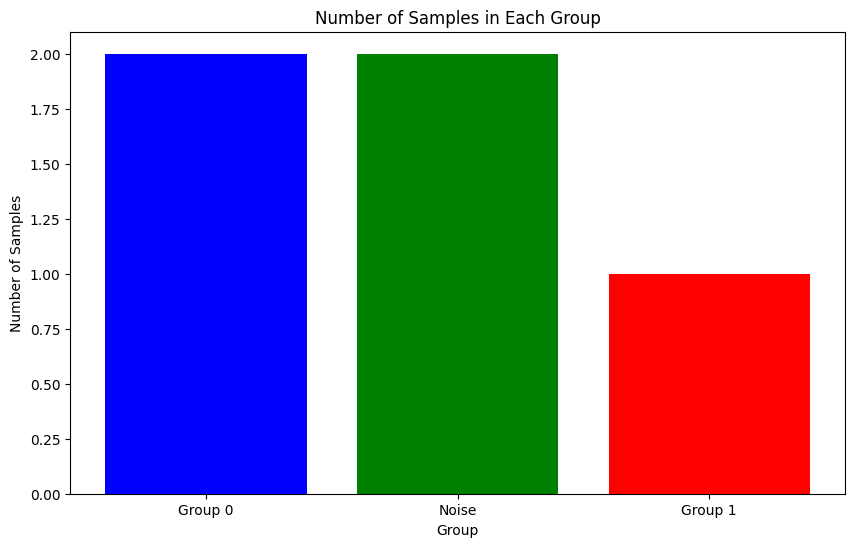

In [124]:
import pandas as pd
import matplotlib.pyplot as plt


# تصنيف العينات بناءً على مجموعة DBSCAN
def classify_cluster(row):
    if row['Clusters'] == 0:
        return 'Group 0'
    elif row['Clusters'] == 1:
        return 'Group 1'
    else:
        return 'Noise'

# تطبيق الدالة على DataFrame
df['Group'] = df.apply(classify_cluster, axis=1)

# حساب عدد العينات في كل مجموعة
group_counts = df['Group'].value_counts()

# رسم المخطط البيناني
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Group')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Group')
plt.show()


#CLV

In [93]:
data.head()

,ID,Transaction,Time,Quantity,CostPerItem,Total_Cost
0,958,2001,2019-02-02 12:50:00,6,11.73,70.38
1,1451,1797,2018-12-26 09:06:00,3,3.52,10.56
3,458,1874,2018-06-22 07:14:00,3,1.73,5.19
4,1404,1786,2018-09-10 11:58:00,3,3.40,10.20
5,1157,2045,2019-01-11 09:50:00,12,3.52,42.24


now CLV

In [94]:
data.head()

,ID,Transaction,Time,Quantity,CostPerItem,Total_Cost
0,958,2001,2019-02-02 12:50:00,6,11.73,70.38
1,1451,1797,2018-12-26 09:06:00,3,3.52,10.56
3,458,1874,2018-06-22 07:14:00,3,1.73,5.19
4,1404,1786,2018-09-10 11:58:00,3,3.40,10.20
5,1157,2045,2019-01-11 09:50:00,12,3.52,42.24


In [95]:

data = data[(data['Quantity'] > 0)]
data.dropna(inplace=True)


cltv_c = data.groupby('ID').agg({'Transaction': lambda x: x.nunique(),
                                'Quantity': lambda x: x.sum(),
                                'Total_Cost': lambda x: x.sum()})

cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']

cltv_c.head()

,total_transaction,total_unit,total_price
ID,,,
200,1,3,17.10
202,1,288,288.00
203,1,6,24.48
204,3,39,178.74
205,1,90,155.70


In [96]:
cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']
cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]

In [97]:
repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
churn_rate = 1 - repeat_rate

In [98]:
cltv_c['profit_margin'] = cltv_c['total_price'] * 0.10
cltv_c.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin
ID,,,,,,
200,1,3,17.10,17.10,0.00094,1.710
202,1,288,288.00,288.00,0.00094,28.800
203,1,6,24.48,24.48,0.00094,2.448
204,3,39,178.74,59.58,0.00282,17.874
205,1,90,155.70,155.70,0.00094,15.570


In [99]:
cltv_c['customer_value'] = cltv_c['avg_order_value'] * cltv_c["purchase_frequency"]

In [100]:
cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']

In [101]:
cltv_c.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv
ID,,,,,,,,
200,1,3,17.10,17.10,0.00094,1.710,0.016071,0.044305
202,1,288,288.00,288.00,0.00094,28.800,0.270677,12.567273
203,1,6,24.48,24.48,0.00094,2.448,0.023008,0.090799
204,3,39,178.74,59.58,0.00282,17.874,0.167989,4.840604
205,1,90,155.70,155.70,0.00094,15.570,0.146335,3.673105


In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [104]:
scaler.fit(cltv_c[["cltv"]])

MinMaxScaler()

In [105]:
cltv_c["scaled_cltv"] = scaler.transform(cltv_c[["cltv"]])

In [106]:
cltv_c.sort_values(by="scaled_cltv", ascending=False).head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv,scaled_cltv
ID,,,,,,,,,
829,3,2247,4590.72,1530.24,0.00282,459.072,4.314586,3193.137897,1.000000
1320,3,2181,3283.56,1094.52,0.00282,328.356,3.086053,1633.600951,0.511597
1430,2,1152,2255.76,1127.88,0.00188,225.576,2.120075,770.977754,0.241448
630,2,318,1912.68,956.34,0.00188,191.268,1.797632,554.294664,0.173589
1213,1,474,1279.80,1279.80,0.00094,127.980,1.202820,248.164855,0.077718


In [107]:
cltv_c["segment"] = pd.qcut(cltv_c["scaled_cltv"], 4, labels=["D", "C", "B", "A"])

cltv_c[["total_transaction", "total_unit", "total_price", "cltv", "scaled_cltv"]].sort_values(by="scaled_cltv",
                                                                                              ascending=False).head()

cltv_c.groupby("segment")[["total_transaction", "total_unit", "total_price", "cltv", "scaled_cltv"]].agg(
    {"count", "mean", "sum"})

C:\Users\Skynet\AppData\Local\Temp\ipykernel_8888\2777588380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_c.groupby("segment")[["total_transaction", "total_unit", "total_price", "cltv", "scaled_cltv"]].agg(


total_transaction                total_unit                     \
                    count  sum      mean      count    sum        mean   
segment                                                                  
D                     271  285  1.051661        271   2589    9.553506   
C                     266  362  1.360902        266   6084   22.872180   
B                     261  422  1.616858        261   8388   32.137931   
A                     266  537  2.018797        266  33378  125.481203   

        total_price                        cltv                           \
              count       sum        mean count           sum       mean   
segment                                                                    
D               271   3111.69   11.482251   271      6.957446   0.025673   
C               266  10764.78   40.469098   266     70.872460   0.266438   
B               261  21594.63   82.738046   261    281.753045   1.079514   
A               266  86227.02  324.161729   266  11058.074561  41.571709   

        scaled_cltv                      
              count       sum      mean  
segment                                  
D               271  0.002179  0.000008  
C               266  0.022195  0.000083  
B               261  0.088237  0.000338  
A               266  3.463075  0.013019

In [108]:
def create_cltv_c(dataframe, profit=0.10):
#	ID	Transaction	Time	Quantity	CostPerItem	Total_Cost
    # Veriyi hazırlama
   
    dataframe = dataframe[(dataframe['Quantity'] > 0)]
    dataframe.dropna(inplace=True)
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["CostPerItem"]
    cltv_c = dataframe.groupby('ID').agg({'ID': lambda x: x.nunique(),
                                                   'Quantity': lambda x: x.sum(),
                                                   'Total_Cost': lambda x: x.sum()})
    cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']

    # avg_order_value
    cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']

    # purchase_frequency
    cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]

    # repeat rate & churn rate
    repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    cltv_c['profit_margin'] = cltv_c['total_price'] * profit

    # Customer Value
    cltv_c['customer_value'] = (cltv_c['avg_order_value'] * cltv_c["purchase_frequency"])

    # Customer Lifetime Value
    cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(cltv_c[["cltv"]])
    cltv_c["scaled_cltv"] = scaler.transform(cltv_c[["cltv"]])

    # Segment
    cltv_c["segment"] = pd.qcut(cltv_c["scaled_cltv"], 4, labels=["D", "C", "B", "A"])

    return cltv_c

In [109]:
data = df.copy()
data.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost,Clusters,group
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38,1,higth_risk
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56,3,good
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80,2,risk
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19,4,v.good
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20,4,v.good


In [112]:
data.to_csv('clvdata.csv', sep=',', index=False, encoding='utf-8')


In [47]:
#cc

other way for clv 

In [48]:
df.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20


In [49]:
dataclv = df.copy()    
dataclv

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56
2,1400,1999,Fri Feb 15 09:45:00 IST 2019,419,72,0.90,Umm Al Quwain,64.80
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20
...,...,...,...,...,...,...,...,...
1762,1920,1871,Mon Jul 23 04:34:00 IST 2018,505,6,10.98,Ras Al Khaimah,65.88
1763,1667,1965,Mon Jul 23 08:58:00 IST 2018,261,3,2.01,Ras Al Khaimah,6.03
1764,1869,1785,Sun Aug 19 07:39:00 IST 2018,548,36,1.73,Ras Al Khaimah,62.28
1766,390,2025,Mon Feb 04 07:30:00 IST 2019,278,3,2.28,Ras Al Khaimah,6.84


In [50]:
#change to  time
dataclv['Time'] = pd.to_datetime(dataclv['Time'])


C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [51]:
dataclv = dataclv[pd.notnull(dataclv['ID'])]

In [52]:
##Keep records with non negative quantity
dataclv = dataclv[(dataclv['Quantity']>0)]

In [53]:
#Add a new column depicting total sales
dataclv['Total_Sales'] = dataclv['Quantity'] * dataclv['CostPerItem']


In [54]:
necessary_cols = ['ID', 'Time', 'Total_Sales']
dataclv = dataclv[necessary_cols]
dataclv.head()

,ID,Time,Total_Sales
0,958,2019-02-02 12:50:00,70.38
1,1451,2018-12-26 09:06:00,10.56
2,1400,2019-02-15 09:45:00,64.80
3,458,2018-06-22 07:14:00,5.19
4,1404,2018-09-10 11:58:00,10.20


In [55]:
#Print records pertaining unique Customer IDs
print(dataclv['ID'].nunique())

1114


In [56]:
#Check the Last order date
last_order_date = dataclv['Time'].max()
print(last_order_date)
print("--------------------------------------")
print(dataclv[(dataclv['ID']==958)])

2019-02-20 08:31:00
--------------------------------------
       ID                Time  Total_Sales
0     958 2019-02-02 12:50:00        70.38
501   958 2019-01-15 05:20:00        86.40
1349  958 2018-04-24 15:49:00        24.48


In [57]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


In [58]:
from lifetimes.plotting import *
from lifetimes.utils import *


In [59]:
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

lf_tx_data = summary_data_from_transaction_data(dataclv, 'ID', 'Time', monetary_value_col='Total_Sales', observation_period_end='2019-02-20 08:31:00')
lf_tx_data.reset_index().head()

,ID,frequency,recency,T,monetary_value
0,200,0.0,0.0,254.0,0.00
1,201,0.0,0.0,154.0,0.00
2,202,0.0,0.0,225.0,0.00
3,203,0.0,0.0,324.0,0.00
4,204,2.0,43.0,123.0,80.82


count    1114.000000
mean        0.555655
std         0.791378
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 59.52 %


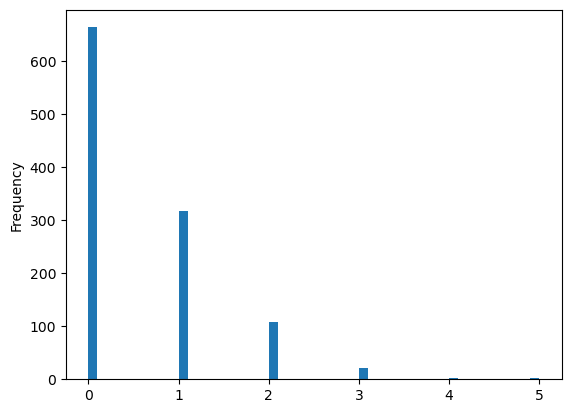

In [60]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lf_tx_data['frequency'].plot(kind='hist', bins=50)
print(lf_tx_data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_tx_data['frequency'] == 0)/float(len(lf_tx_data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [61]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])
print(bgf)

      fun: 0.48534301490007414
 hess_inv: array([[ 1227901.58907652,  1227907.97515378, -2608721.18863889,
         2706923.89220663],
       [ 1227907.97515378,  1227916.29945467, -2608737.04757291,
         2706940.34644561],
       [-2608721.18863889, -2608737.04757291,  5542328.50870612,
        -5750962.8821986 ],
       [ 2706923.89220663,  2706940.3464456 , -5750962.88219859,
         5967453.12571023]])
      jac: array([-5.52863120e-06,  5.06319715e-06,  3.22772229e-20,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 44
      nit: 22
     njev: 38
   status: 2
  success: False
        x: array([  9.52930757,   9.40277582, -20.00433791,  20.95538024])


ConvergenceError: 
The model did not converge. Try adding a larger penalizer to see if that helps convergence.


In [ ]:
bgf.summary

In [ ]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

In [ ]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [ ]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
lf_tx_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T']),2)
lf_tx_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

In [ ]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [ ]:
#Customer's future transaction prediction for next 10 days

t = 10
individual = lf_tx_data.loc[849]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

In [ ]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
lf_tx_data[['monetary_value', 'frequency']].corr()

In [ ]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

In [ ]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

In [ ]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']
    ).head(10))

In [ ]:
lf_tx_data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']), 2)
lf_tx_data.reset_index().head()

In [ ]:
#Calculate Customer Lifetime Value
lf_tx_data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lf_tx_data['frequency'],
    lf_tx_data['recency'],
    lf_tx_data['T'],
    lf_tx_data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

lf_tx_data.drop(lf_tx_data.iloc[:, 0:6], inplace=True, axis=1)

lf_tx_data.sort_values(by='CLV', ascending=False).head(10).reset_index()


Cohort Analysis   

In [725]:
Rak_data.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost
0,958,2001,Sat Feb 02 12:50:00 IST 2019,547,6,11.73,Ras Al Khaimah,70.38
1,1451,1797,Wed Dec 26 09:06:00 IST 2018,530,3,3.52,Ras Al Khaimah,10.56
3,458,1874,Fri Jun 22 07:14:00 IST 2018,286,3,1.73,Ras Al Khaimah,5.19
4,1404,1786,Mon Sep 10 11:58:00 IST 2018,267,3,3.40,Ras Al Khaimah,10.20
5,1157,2045,Fri Jan 11 09:50:00 IST 2019,568,12,3.52,Ras Al Khaimah,42.24


In [729]:
Rak_data.columns

Index(['ID', 'Transaction', 'Time', 'Item -code ', 'Quantity', 'CostPerItem',
       'CITY', 'Total_Cost'],
      dtype='object')

In [731]:
# Convert purchase_date column to datetime format
Rak_data['Time'] = pd.to_datetime(Rak_data['Time'])


In [744]:
# Extract the cohort month (year-month) from the purchase date
Rak_data['cohort_month'] = Rak_data['Time'].dt.to_period('M')
Rak_data['cohort_month']

0       2019-02
1       2018-12
3       2018-06
4       2018-09
5       2019-01
         ...   
1762    2018-07
1763    2018-07
1764    2018-08
1766    2019-02
1767    2018-12
Name: cohort_month, Length: 1607, dtype: period[M]

In [742]:
# Assign a cohort index to each customer based on their first purchase month
Rak_data['cohort_index'] = Rak_data.groupby('ID')['Time'].transform('min').dt.to_period('M')
Rak_data['cohort_index']

0       2018-04
1       2018-09
3       2018-05
4       2018-09
5       2019-01
         ...   
1762    2018-07
1763    2018-07
1764    2018-08
1766    2018-12
1767    2018-12
Name: cohort_index, Length: 1607, dtype: period[M]

In [743]:
# Calculate the number of customers in each cohort
cohort_size = Rak_data.groupby(['cohort_index', 'cohort_month']).agg({'ID': 'nunique'}).reset_index()
cohort_size = cohort_size.rename(columns={'ID': 'cohort_size'})


,cohort_index,cohort_month,cohort_size
0,2018-02,2018-02,112
1,2018-02,2018-03,6
2,2018-02,2018-04,8
3,2018-02,2018-05,5
4,2018-02,2018-06,6
...,...,...,...
84,2018-12,2019-01,6
85,2018-12,2019-02,13
86,2019-01,2019-01,122
87,2019-01,2019-02,14


In [766]:
# Calculate the number of active customers for each month after the cohort month
Rak_data['active_customers'] = Rak_data.groupby(['cohort_index', 'cohort_month'])['ID'].transform('nunique')

Rak_data.head()

,ID,Transaction,Time,Item -code,Quantity,CostPerItem,CITY,Total_Cost,cohort_index,cohort_month,active_customers
0,958,2001,2019-02-02 12:50:00,547,6,11.73,Ras Al Khaimah,70.38,2018-04,2019-02,12
1,1451,1797,2018-12-26 09:06:00,530,3,3.52,Ras Al Khaimah,10.56,2018-09,2018-12,7
3,458,1874,2018-06-22 07:14:00,286,3,1.73,Ras Al Khaimah,5.19,2018-05,2018-06,6
4,1404,1786,2018-09-10 11:58:00,267,3,3.40,Ras Al Khaimah,10.20,2018-09,2018-09,73
5,1157,2045,2019-01-11 09:50:00,568,12,3.52,Ras Al Khaimah,42.24,2019-01,2019-01,122


In [767]:
# Calculate the retention rate
#Rak_data['retention_rate'] = Rak_data['active_customers'] / Rak_data['cohort_size']


KeyError: 'cohort_size'

In [1]:

# Create a pivot table for cohort analysis
#cohort_analysis = Rak_data.pivot_table(index='cohort_index', columns='cohort_month', values='retention_rate')


In [ ]:
# Plot the cohort analysis heatmap
plt.figure(figsize=(10, 8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(cohort_analysis, annot=True, cmap='YlGnBu', fmt='.1%')
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Index')
plt.show()
